<a href="https://colab.research.google.com/github/RaghunathSai/Algorithms/blob/master/BDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/drive/MyDrive/Kaggle
#Check the present working directory using pwd command

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d jhashanku007/devnagri-hindi-dataset

 99% 157M/159M [00:01<00:00, 124MB/s]
100% 159M/159M [00:01<00:00, 96.9MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
%cd /content/drive/MyDrive/Kaggle/DevanagariHandwrittenCharacterDataset/

/content/drive/MyDrive/Kaggle/DevanagariHandwrittenCharacterDataset


In [ ]:
!ls

Model-1.h5  Model-3.h5	    Test   X_test.csv	Y_test.csv
Model-2.h5  References.npy  Train  X_train.csv	Y_train.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
from keras.optimizers import Adam
import pandas as pd
import skimage.io as io
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
train_dir = os.listdir('Train')
test_dir = os.listdir('Test')

In [ ]:
def create_train_data():
    ref = {}
    X_train = []
    Y_train = []
    for i in range(0,10,1):
        p = 37+i
        ref[p] = i
    for names in train_dir:
        x = names.split('_')
        if x[0]=='character':
            ref[int(x[1])] = x[2]
        di = 'Train/'+names
        images = os.listdir(di)
        for files in images:
            files = di+'/'+files
            img = io.imread(files)
            X_train.append(img)
            if x[0]=='character':
                Y_train.append(int(x[1]))
            elif x[0]=='digit':
                Y_train.append(37 + int(x[1]))
    X_train = np.array(X_train)
    Y_train = np.asarray(Y_train)
    return X_train, Y_train, ref

In [ ]:
X_train, Y_train, ref = create_train_data()

In [ ]:
def create_test_data():
    X_test = []
    Y_test = []
    for names in test_dir:
        x = names.split('_')
        di = 'Test/'+names
        images = os.listdir(di)
        for files in images:
            files = di+'/'+files
            img = io.imread(files)
            X_test.append(img)
            if x[0]=='character':
                Y_test.append(int(x[1]))
            elif x[0]=='digit':
                Y_test.append(37 + int(x[1]))
    X_test = np.array(X_test)
    Y_test = np.asarray(Y_test)
    return X_test, Y_test

In [ ]:
X_test, Y_test = create_test_data()

In [ ]:
X_train = X_train.reshape([78200,-1])
print(X_train.shape)
df = pd.DataFrame(X_train)
df.to_csv('X_train.csv')

(78200, 1024)


In [ ]:
print(X_test.shape)
X_test = X_test.reshape([13800,1024])
print(X_test.shape)
df = pd.DataFrame(X_test)
df.to_csv('X_test.csv')

(13800, 32, 32)
(13800, 1024)


In [ ]:
Y_train = Y_train.reshape([78200,-1])
print(Y_train.shape)
df = pd.DataFrame(Y_train)
df.to_csv('Y_train.csv')

(78200, 1)


In [ ]:
Y_test = Y_test.reshape([13800,-1])
print(Y_test.shape)
df = pd.DataFrame(Y_test)
df.to_csv('Y_test.csv')

(13800, 1)


In [ ]:
np.save('References.npy',ref)

In [ ]:
#os.chdir('/content/drive/MyDrive/Kaggle/Hindi Handwritten Character Dataset')
os.listdir()

['Test',
 'Train',
 'X_train.csv',
 'X_test.csv',
 'Y_train.csv',
 'Y_test.csv',
 'References.npy',
 'Model-2.h5']

In [ ]:
X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop(X_train.columns[0], axis = 1)
X_train = np.array(X_train)

In [ ]:
Y_train = pd.read_csv('Y_train.csv')
Y_train = Y_train.drop(Y_train.columns[0], axis = 1)
Y_train = np.array(Y_train)

In [ ]:
X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop(X_test.columns[0], axis = 1)
X_test = np.array(X_test)

In [ ]:
Y_test = pd.read_csv('Y_test.csv')
Y_test = Y_test.drop(Y_test.columns[0], axis = 1)
Y_test = np.array(Y_test)

In [ ]:
X_train = X_train.reshape((78200,32,32,1))
print(X_train.shape)
Y_train = Y_train.reshape((78200,1))
print(Y_train.shape)
X_test = X_test.reshape((13800,32,32,1))
print(X_test.shape)
Y_test = Y_test.reshape((13800,1))
print(Y_test.shape)

(78200, 32, 32, 1)
(78200, 1)
(13800, 32, 32, 1)
(13800, 1)


In [ ]:
#ref = np.load('References.npy').item()
ref = {1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}
print(ref)

{1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 0)

In [ ]:
#plt.imshow(X_test[0])
#import tensorflow as tf
#plt.imshow( tf.shape( tf.squeeze(X_test[0]) ) )
#print(ref[int(Y_test[0])])

In [ ]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(5520, 32, 32, 1)
(8280, 32, 32, 1)


In [ ]:
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(5520, 47)


In [ ]:
Y_val = to_categorical(Y_val)
print(Y_val.shape)

(8280, 47)


In [ ]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(78200, 47)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(47, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

In [ ]:
model.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 400, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/100
196/196 [==============================] - 11s 52ms/step - loss: 3.3597 - accuracy: 0.1710 - val_loss: 2.5789 - val_accuracy: 0.5051
Epoch 2/100
196/196 [==============================] - 9s 48ms/step - loss: 1.1190 - accuracy: 0.7108 - val_loss: 0.7430 - val_accuracy: 0.8912
Epoch 3/100
196/196 [==============================] - 9s 48ms/step - loss: 0.5120 - accuracy: 0.8717 - val_loss: 0.1394 - val_accuracy: 0.9665
Epoch 4/100
196/196 [==============================] - 9s 48ms/step - loss: 0.3180 - accuracy: 0.9218 - val_loss: 0.0764 - val_accuracy: 0.9769
Epoch 5/100
196/196 [==============================] - 9s 48ms/step - loss: 0.2276 - accuracy: 0.9425 - val_loss: 0.0491 - val_accuracy: 0.9877
Epoch 6/100
196/196 [==============================] - 10s 49ms/step - loss: 0.1756 - accuracy: 0.9558 - val_loss: 0.0535 - val_accuracy: 0.9838
Epoch 7/100
196/196 [==============================] - 10s 49ms/step - loss: 0.1520 - accuracy: 0.9614 - val_loss: 0.0431 - val_accura

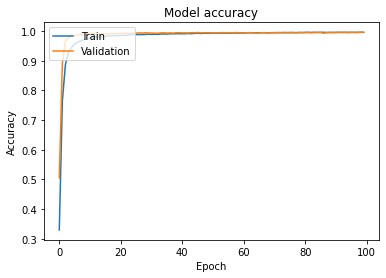

In [27]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


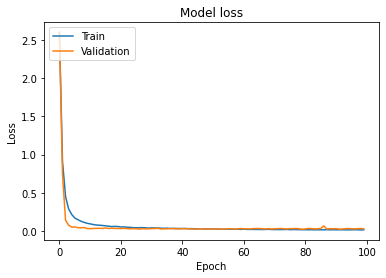

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
model.save('HWCR-Hindi-Model.h5')

In [30]:
model.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

14/14 [==============================] - 0s 34ms/step - loss: 0.0320 - accuracy: 0.9946


[0.03198523446917534, 0.9945651888847351]

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
#model = load_model('HWCR-Hindi-Model.h')

173/173 [==============================] - 1s 3ms/step
ba


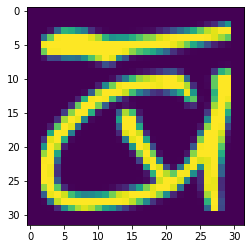

In [33]:
predicted = model.predict(x = X_test, verbose = 1)
index = 789
img = X_test[index]
img = img.reshape((32,32))
plt.imshow(img)
predicted = np.argmax(predicted, axis = 1)
print(ref[predicted[index]])


In [ ]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
from keras.optimizers import Adam
import pandas as pd
import skimage.io as io
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#%cd /content/drive/MyDrive/Kaggle/DevanagariHandwrittenCharacterDataset/

train_dir = os.listdir('Train')
test_dir = os.listdir('Test')

def create_train_data():
    ref = {}
    X_train = []
    Y_train = []
    for i in range(0,10,1):
        p = 37+i
        ref[p] = i
    for names in train_dir:
        x = names.split('_')
        if x[0]=='character':
            ref[int(x[1])] = x[2]
        di = 'Train/'+names
        images = os.listdir(di)
        for files in images:
            files = di+'/'+files
            img = io.imread(files)
            X_train.append(img)
            if x[0]=='character':
                Y_train.append(int(x[1]))
            elif x[0]=='digit':
                Y_train.append(37 + int(x[1]))
    X_train = np.array(X_train)
    Y_train = np.asarray(Y_train)
    return X_train, Y_train, ref

X_train, Y_train, ref = create_train_data()

def create_test_data():
    X_test = []
    Y_test = []
    for names in test_dir:
        x = names.split('_')
        di = 'Test/'+names
        images = os.listdir(di)
        for files in images:
            files = di+'/'+files
            img = io.imread(files)
            X_test.append(img)
            if x[0]=='character':
                Y_test.append(int(x[1]))
            elif x[0]=='digit':
                Y_test.append(37 + int(x[1]))
    X_test = np.array(X_test)
    Y_test = np.asarray(Y_test)
    return X_test, Y_test

X_test, Y_test = create_test_data()

X_train = X_train.reshape([78200,-1])
print(X_train.shape)
df = pd.DataFrame(X_train)
df.to_csv('X_train.csv')

print(X_test.shape)
X_test = X_test.reshape([13800,1024])
print(X_test.shape)
df = pd.DataFrame(X_test)
df.to_csv('X_test.csv')

Y_train = Y_train.reshape([78200,-1])
print(Y_train.shape)
df = pd.DataFrame(Y_train)
df.to_csv('Y_train.csv')

Y_test = Y_test.reshape([13800,-1])
print(Y_test.shape)
df = pd.DataFrame(Y_test)
df.to_csv('Y_test.csv')

np.save('References.npy',ref)
os.listdir()

X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop(X_train.columns[0], axis = 1)
X_train = np.array(X_train)

Y_train = pd.read_csv('Y_train.csv')
Y_train = Y_train.drop(Y_train.columns[0], axis = 1)
Y_train = np.array(Y_train)

X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop(X_test.columns[0], axis = 1)
X_test = np.array(X_test)

Y_test = pd.read_csv('Y_test.csv')
Y_test = Y_test.drop(Y_test.columns[0], axis = 1)
Y_test = np.array(Y_test)

X_train = X_train.reshape((78200,32,32,1))
print(X_train.shape)
Y_train = Y_train.reshape((78200,1))
print(Y_train.shape)
X_test = X_test.reshape((13800,32,32,1))
print(X_test.shape)
Y_test = Y_test.reshape((13800,1))
print(Y_test.shape)

X_train = X_train/255
X_test = X_test/255

X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 0)

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

Y_test = to_categorical(Y_test)
print(Y_test.shape)

Y_val = to_categorical(Y_val)
print(Y_val.shape)

Y_train = to_categorical(Y_train)
print(Y_train.shape)

#HWCR-Hindi-Model

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(47, activation='softmax'))

print(model.summary())

model.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 80, batch_size = 400, validation_data = (X_val, Y_val), verbose = 1)


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the model
model.save('HWCR-Hindi-Model.h5')
model.evaluate(X_test, Y_test, batch_size = 400, verbose =1)
model.metrics_names

# Test the model on various images in test set
predicted = model.predict(x = X_test, verbose = 1)
index = 789
img = X_test[index]
img = img.reshape((32,32))
plt.imshow(img)
predicted = np.argmax(predicted, axis = 1)
print(ref[predicted[index]])